<a href="https://colab.research.google.com/github/imaboylol/itmo-advanced-ml-and-dl/blob/main/clustering/Clustering_Digits_K_Means_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE

In [13]:
(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

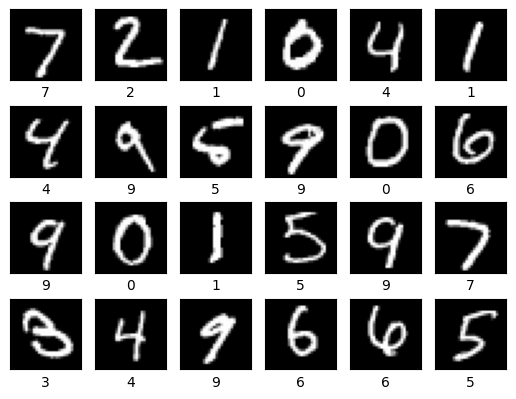

In [14]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [15]:
# < ENTER YOUR CODE HERE >
print("X test: {}".format(X.shape))
print("y test: {}".format(y.shape))

X test: (10000, 28, 28)
y test: (10000,)


При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [16]:
# < ENTER YOUR CODE HERE >
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [17]:
# < ENTER YOUR CODE HERE >

# shape изображения - 28х28 пикселей, 10k изображений -> будем работать с вектором 28х28 = 784
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [34]:
kmeans = KMeans(n_clusters=10, random_state=27)
kmeans.fit(X_train_flat)

KMeans(n_clusters=10, random_state=27)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [35]:
# < ENTER YOUR CODE HERE >
clusters_count = np.bincount(kmeans.labels_)

for i, count in enumerate(clusters_count):
    print(f"Cluster {i}: {count} img.")

Cluster 0: 836 img.
Cluster 1: 570 img.
Cluster 2: 653 img.
Cluster 3: 1149 img.
Cluster 4: 652 img.
Cluster 5: 859 img.
Cluster 6: 892 img.
Cluster 7: 633 img.
Cluster 8: 1012 img.
Cluster 9: 744 img.


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



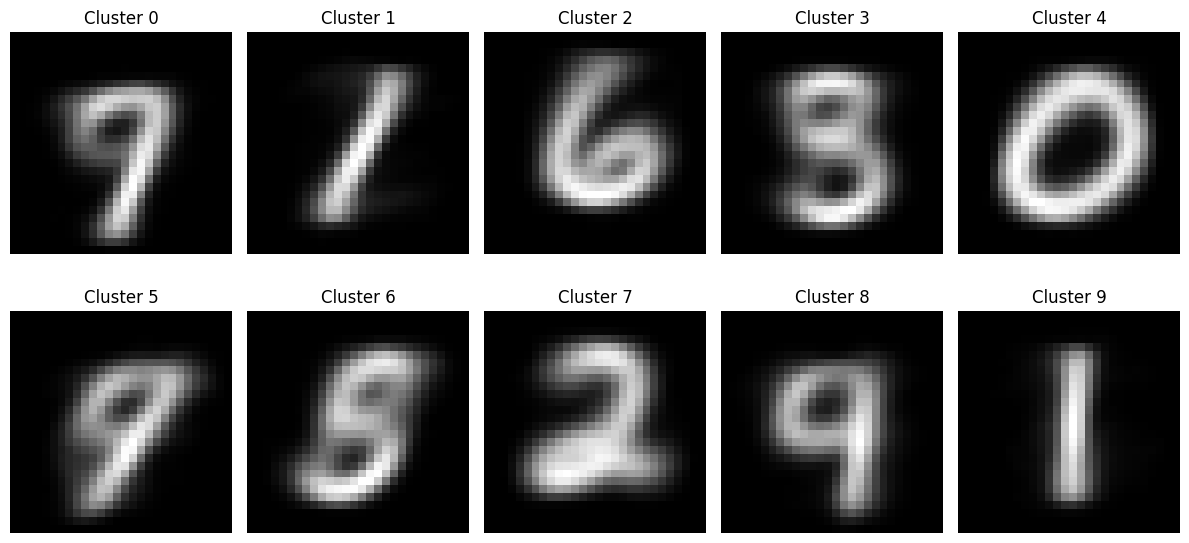

In [36]:
# < ENTER YOUR CODE HERE >
# координаты центроидов
centroids = kmeans.cluster_centers_

# изображения центроидов
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Преобразуем центроид обратно в изображение 28x28
    centroid_image = centroids[i].reshape(28, 28)
    ax.imshow(centroid_image, cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [40]:
# < ENTER YOUR CODE HERE >

# Определим метки для каждого кластера
train_clusters = kmeans.predict(X_train_flat)

# Создаем словарь для сопоставления кластеров и меток
cluster_labels = {}

for i in range(10):
    # Выбираем все истинные метки, относящиеся к текущему кластеру
    labels = y_train[train_clusters == i]
    # Определяем наиболее частую метку (модальное значение)
    most_common_label = mode(labels, keepdims=True).mode[0]
    cluster_labels[i] = most_common_label

# Формируем список меток кластеров
cluster_labels_list = [cluster_labels[i] for i in range(10)]
print("labels after transform:", ", ".join(map(str, cluster_labels_list)))

labels after transform: 7, 1, 6, 3, 0, 4, 5, 2, 4, 1


Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [42]:
# < ENTER YOUR CODE HERE >
# предсказанные кластеры в метки
y_pred = np.array([cluster_labels[cluster] for cluster in train_clusters])

accuracy = accuracy_score(y_train, y_pred)
print(f"train accuracy: {accuracy:}")

train accuracy: 0.573125


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [43]:
# < ENTER YOUR CODE HERE >
# предсказания для тестового набора данных
test_clusters = kmeans.predict(X_test_flat)

# предсказанные кластеры в метки на основе сопоставлений, найденных на тренировочных данных
y_test_pred = np.array([cluster_labels[cluster] for cluster in test_clusters])

# точность на тестовом наборе данных
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"test accuracy: {test_accuracy:}")

test accuracy: 0.542


Постройте матрицу ошибок.

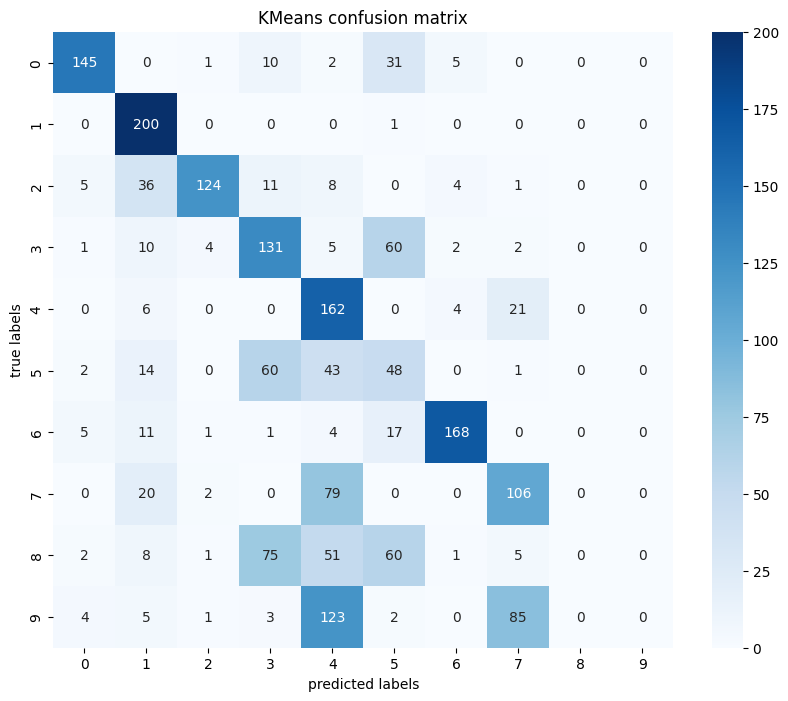

In [48]:
# < ENTER YOUR CODE HERE >
# Построим матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Визуализируем матрицу ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("predicted labels")
plt.ylabel("true labels")
plt.title("KMeans confusion matrix")
plt.show()

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [47]:
# < ENTER YOUR CODE HERE >
mistakes_for_8 = conf_matrix[8]
most_confused_with_8 = np.argmax(mistakes_for_8[np.arange(10) != 8])
print(f"цифра 8 чаще всего путается с цифрой: {most_confused_with_8}")

цифра 8 чаще всего путается с цифрой: 3


Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [50]:
# < ENTER YOUR CODE HERE >
# t-SNE transform
tsne = TSNE(n_components=2, init='random', random_state=27)
X_train_tsne = tsne.fit_transform(X_train_flat)

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [53]:
# < ENTER YOUR CODE HERE >
kmeans = KMeans(n_clusters=10, random_state=27)
train_clusters = kmeans.fit_predict(X_train_tsne)

cluster_labels = {}
for i in range(10):
    labels = y_train[train_clusters == i]
    most_common_label = mode(labels, keepdims=True).mode[0]
    cluster_labels[i] = most_common_label

y_train_pred = np.array([cluster_labels[cluster] for cluster in train_clusters])

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"train accuracy after t-SNE transform: {train_accuracy:}")

train accuracy after t-SNE transform: 0.822375


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.